In [1]:
# %load_ext autoreload
# %autoreload 2

# Rhine level prediction

Predict the rhine level in Bonn.

[Feedback link for this task](https://beta.ins.uni-bonn.de/feedback/mllab?obj=Rhinelevel)

Source for the data:

    Wasserstraßen- und Schifffahrtsverwaltung des Bundes (WSV),
    bereitgestellt durch die Bundesanstalt für Gewässerkunde (BfG).

which (unofficially) translates to

    German Federal Waterways and Shipping Administration (WSV),
    provided by the German Federal Institute of Hydrology (BfG).

You may need to install additional packages. This can be done using the following command:

In [2]:
!pip install -r mllab/rhinelevel/requirements.txt
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [3]:
import pandas as pd
import numpy as np
from mllab.rhinelevel import wsv, dwd
CACHE = './cache'

The dataset is expected to be stored in the folder `data` relative to this notebook.

In [4]:
levels = wsv.RiverLevelData('data/riverlevels.tar.bz2', CACHE)

We plot the stations in a map. This might need a restart of Jupyter in order to work.

In [5]:
import ipyleaflet as leaf
m = leaf.Map(center=(50.2, 7.5), zoom=7, basemap=leaf.basemaps.Hydda.Full)
markers = []
for station in levels.stations():
    title = "{}, river km {}, zero points over sea {}".format(station.name, station.river_km, station.zero)
    m += leaf.Marker(location=station.pos, draggable=False, title=title)

m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

Collect the station data into a Pandas DataFrame

In [6]:
df = levels.to_frame()

Parse Andernach
Parse Bingen
Parse Bonn
Parse Frankfurt Osthafen
Parse Kalkofen Neu
Parse Kaub
Parse Koblenz
Parse Koblenz Up
Parse Mainz
Parse Oberwinter
Parse Oestrich
Parse Raunheim
Parse Rockenau Ska
Parse Speyer
Parse Worms


In [7]:
df[500000:500010]

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
1995-04-06 07:15:00+00:00,461.0,311.0,498.0,215.0,333.0,371.0,389.0,361.0,419.0,415.0,289.0,191.0,236.0,486.0,339.0
1995-04-06 07:30:00+00:00,461.0,311.0,498.0,216.0,330.0,371.0,388.0,362.0,419.0,414.0,289.0,191.0,240.0,486.0,339.0
1995-04-06 07:45:00+00:00,460.0,311.0,497.0,216.0,329.0,371.0,388.0,362.0,420.0,414.0,289.0,190.0,238.0,487.0,339.0
1995-04-06 08:00:00+00:00,460.0,311.0,497.0,217.0,327.0,371.0,388.0,358.0,419.0,413.0,288.0,190.0,236.0,486.0,339.0
1995-04-06 08:15:00+00:00,459.0,311.0,497.0,215.0,325.0,371.0,386.0,357.0,419.0,413.0,288.0,191.0,240.0,486.0,339.0
1995-04-06 08:30:00+00:00,459.0,311.0,496.0,213.0,325.0,371.0,386.0,357.0,418.0,413.0,288.0,193.0,239.0,486.0,338.0
1995-04-06 08:45:00+00:00,458.0,310.0,495.0,215.0,325.0,371.0,386.0,356.0,418.0,412.0,288.0,190.0,239.0,486.0,338.0
1995-04-06 09:00:00+00:00,458.0,310.0,494.0,216.0,324.0,371.0,385.0,355.0,418.0,411.0,288.0,189.0,236.0,486.0,337.0
1995-04-06 09:15:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,384.0,355.0,418.0,411.0,288.0,188.0,234.0,486.0,338.0
1995-04-06 09:30:00+00:00,457.0,310.0,494.0,214.0,324.0,370.0,383.0,358.0,418.0,410.0,288.0,186.0,237.0,486.0,338.0


In [8]:
#df.to_csv("rhineset.csv")

In [9]:
#df = pd.read_csv("rhineset.csv", index_col=0)
#df[300000:300100]

### Pandas info

The DataFrame `df` is index by a time series, see the [documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) for more details.

To get a NumPy array just run `df.as_matrix()`. You can select which columns you want by

```python
df[['Worms', 'Kaub']].as_matrix()
```

## Remarks

- Not all stations start at the same time, in this case there are `NaN` values.
- Also, there were some failures in which case there is also a `NaN` stored.
    - The [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) might be helpful.
- You might want to select a subset of available stations at the beginning (pick reasonable ones)
    - The flow speed of the river is at around 7km/h, this varies, though. Hover over the map markers to see how far the stations are apart
- You can also check how far you can make predictions into the future
- A wavelet transformation could be interesting as a feature map, check out [PyWavelet](https://pywavelets.readthedocs.io/en/latest/)

## Real-time prediction

If you are interested in this, you can get real time measurements for the stations by using

```python
df = levels.to_frame(recent=True)
```

This will return a dataframe with measurements from the last 30 days, also in 15 minute intervals.

Zu Beginn droppe ich alle Zeilen mit NaN-Werten

In [10]:
no_NaN_df = df.dropna()

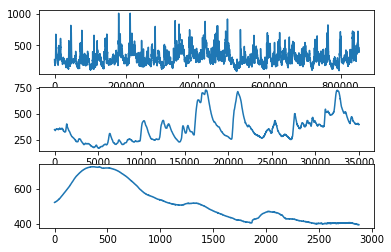

In [11]:
import matplotlib.pyplot as plt # bei mir muss man das 2-mal laufen lassen damit die plots kommen
%matplotlib inline

Bonn = no_NaN_df[['Bonn']].values
fig, ax = plt.subplots(3,1)
#plt.subplot(Bonn[-200000:,0])
ax[0].plot(np.arange(0, len(Bonn[:,0])), Bonn[:,0]) # gesamte Daten 1989-2013
ax[1].plot(np.arange(0, len(Bonn[-35040:,0])), Bonn[-35040:,0]) # Daten 2013
ax[2].plot(np.arange(0, len(Bonn[-2880:,0])), Bonn[-2880:,0]) # Daten von einem Monat in 2013

Text(0, 0.5, 'Wasserstand')

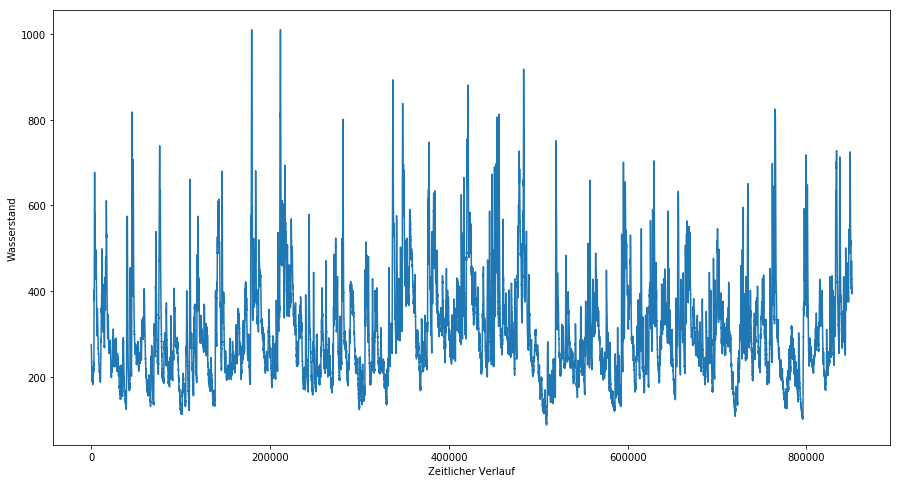

In [12]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[:,0])), Bonn[:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Text(0, 0.5, 'Wasserstand')

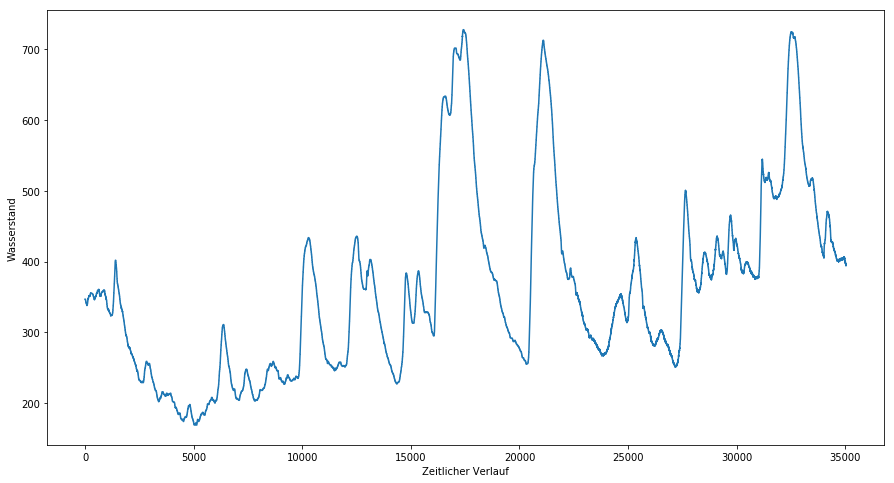

In [13]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-35040:,0])), Bonn[-35040:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Text(0, 0.5, 'Wasserstand')

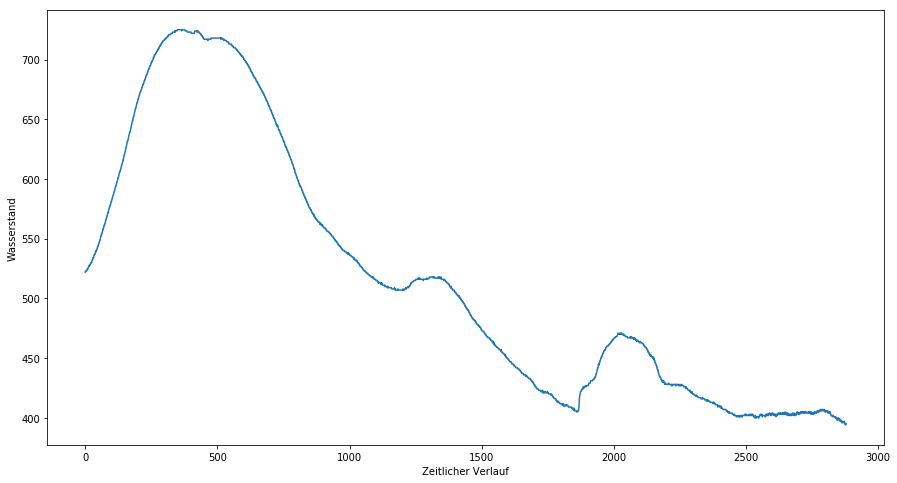

In [14]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.arange(0, len(Bonn[-2880:,0])), Bonn[-2880:,0])
plt.xlabel('Zeitlicher Verlauf')
plt.ylabel('Wasserstand')

Rein intuitiv sollte man recht gut den Pegel des Flusses in naher Zukunft vorhersagen können, wenn man die Daten von Flussaufwärts hat. Also schaue ich mir als erstes die Autokovarianzfunktion an.

In [15]:
# Daten nach Jahr Aufteilen
yearly_data = []
for i in range(1989, 2013):
    yearly_data.append(no_NaN_df.loc[str(i) + '-01-01 00:00:00+00:00': str(i) + '-12-31 23:45:00+00:00',:])

Text(0.5, 0, 'Jahresverlauf')

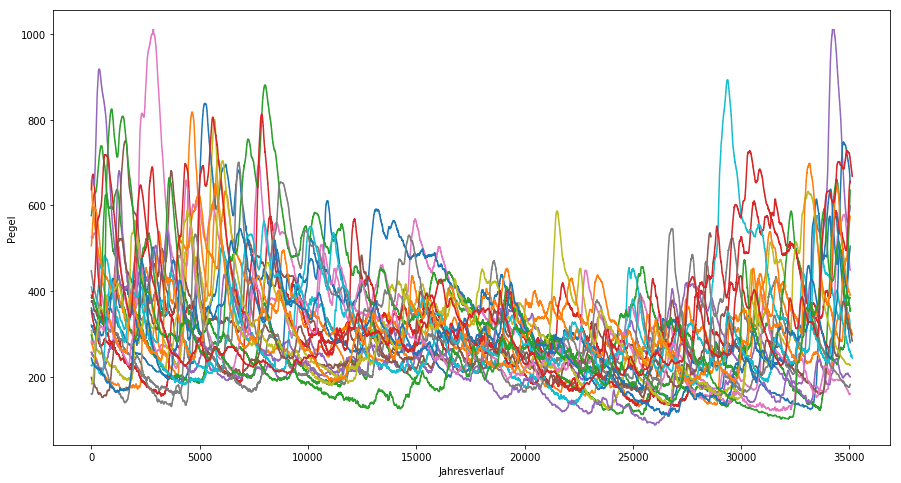

In [16]:
# zumindest ab Eintrag yearly_data[9] sind Daten vollständig
# plotte daten
fig = plt.figure(figsize=(15,8))
for i in range(0, 24):
    plt.plot(np.arange(0, len(yearly_data[i])), yearly_data[i]['Bonn'])
  
plt.ylabel('Pegel')
plt.xlabel('Jahresverlauf')

In [17]:
# Vollständigkeit der Daten innerhalb Jahre prüfen
yearly_data_size = np.zeros(24)
for i in range(0, 24):
    yearly_data_size[i] = yearly_data[i].shape[0]
yearly_data_size

array([35040., 35040., 35040., 34080., 35037., 28611., 35040., 32160.,
       32064., 35040., 35040., 35136., 35040., 35040., 35040., 35136.,
       35040., 35040., 35040., 35135., 35040., 35040., 35040., 35136.])

In [18]:
# differencing Daten um eine stationäre Zeitreihe zu bekommen(oder nicht)
differenced_Bonn = np.diff(Bonn[::48], n=1, axis=0) # daten in 12 Stunden Rhythmus

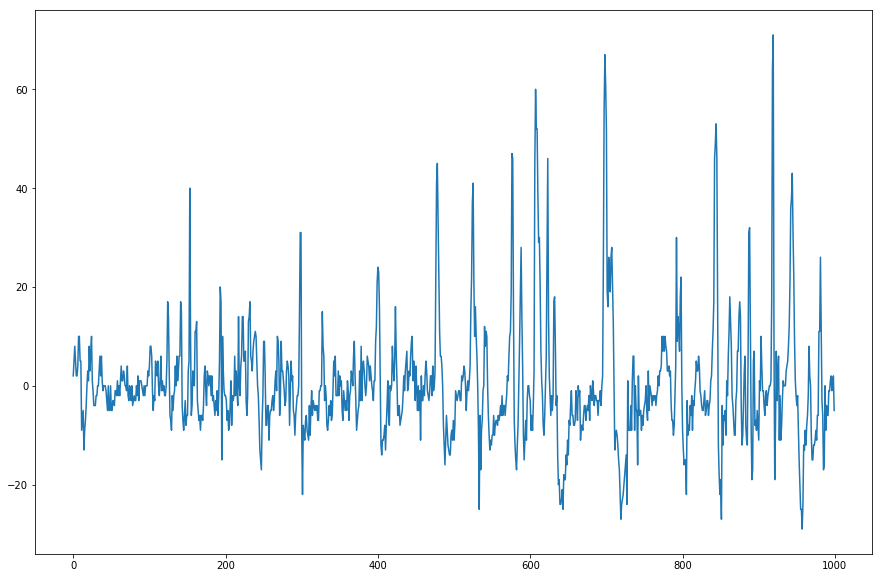

In [19]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(0, 1000), differenced_Bonn[-1000:])

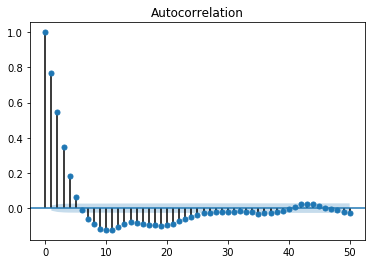

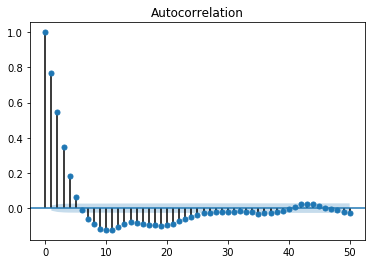

In [20]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(differenced_Bonn, lags=50)

Mittelwert verändert sich etwas innerhalb des Jahres, Varianz verändert sich stark innerhalb des Jahres. Ansonsten keine klare jahresübergreifende Struktur. => Lange vorhersagen sind wahrscheinlich schwierig.

In [21]:
"""
Erster Vorhersage versuch: ARIMA Modell mit ausschließlich den Daten aus Bonn (Das ist analog zu OLS Regression mit ARIMA
verteilten Residuen)
"""
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(differenced_Bonn, order=(0,0,3)) # das ::4 bedeutet man nimmt jeden vierten Eintrag, also Stündlich Daten
model_fit = model.fit()

In [22]:
model_fit.params

array([0.00607368, 0.79511647, 0.55039338, 0.25915406])

In [23]:
def arima_model(dataset, arima_order): # dataset als 1d-array und arima_order 3-tuple (p,d,q)
    train_set_size = int(len(dataset*0.7))
    train = dataset[:train_set_size]
    test = dataset[train_set_size:]
    history = [x for x in train] # hier werden nach und nach die benutzten testsets angehängt
    #prediction
    prediction = list()
    for t in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit(disp=0)
        single_prediction = model.fit.forecast()[0]
        prediction.append(single_prediction)
        history.append(test[t])
    error = mean_squared_error(test, prediction)
    return error

In [24]:
#arima_model(differenced_Bonn, (0,0,3))

model = sm.tsa.statespace.SARIMAX(Bonn[-35040::4,0], trend = 'c', order = (0,0,1))
model_fit = model.fit()

print(model_fit.summary())

# Linear Regression Model

In [25]:
"""
Zweiter Versuch: Lineare regression
Verbesserungsmöglichkeiten: 
++Bessere/mehr Variablen einbauen(von Mehr Stationen/mehr Zeitschritten/höhere Ableitungen)
++PCA oder Autoencoder oder so zur Dimensionsreduktion
+AIC oder BIC zum bestimmen der Anzahl Variablen
-adjusted R squared einbauen
+Crossvalidation anstatt einfachen Train-Test-Split
+Residuedsxdeen als Zeitreihe Modellieren
-homoskedastizität hinbekommen(bin eher dafür, es so zu lassen)
-Poissonregression (mathematisch korrekter, wird aber keinen Unterschied machen)
"""

#imports
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

## Creation of training data

We train our linear regression model on water level measurements from every station at the following times: current as well as 15min, 30min, 1h, 3h and 6h ago. This gives us 90-dimensional data at for every point in time.

In [26]:
#get water levels out of the dataframe into an ndarray
water_levels=no_NaN_df.values 

In [27]:
#create data points

#we need to slice the arrays so data from different points in time aligns properly

#current
current_data=water_levels[24:-48]

#15min ago
last_data=water_levels[23:-49]

#30min
last2_data=water_levels[22:-50]

#1h
oneh_ago_data=water_levels[20:-52]

#3h
threeh_ago_data=water_levels[12:-60]

#6h
sixh_ago_data=water_levels[:-72]


#gather all data into a single set
independent_variable = np.c_[current_data, last_data, last2_data, oneh_ago_data, threeh_ago_data, sixh_ago_data] 


#get the water levels in Bonn into a separate variable for training
dependent_variable = no_NaN_df[['Bonn']].values

#align properly so these are 12h in the future
dependent_variable_reduced = dependent_variable[72:]

## Training of the model

We're using scikit-learn's TimeSeriesSplit function, which [explanation]

We will do PCA later on, but have included the original code without PCA below in order to show the differences and the loss:

In [28]:
number_splits = 20
ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(independent_variable):
    #create train and test set
    independent_variable_train = independent_variable[train_index]
    independent_variable_test = independent_variable[test_index]
    dependent_variable_train = dependent_variable_reduced[train_index]
    dependent_variable_test = dependent_variable_reduced[test_index]
    
    #fit linear regression model
    reg = LinearRegression(fit_intercept=True, normalize =True)
    regression_model_fit = reg.fit(independent_variable_train, dependent_variable_train)
    
    #prediction on test set
    prediction_regression_model=reg.predict(independent_variable_test)
    
    #output mse
    print(np.sum(((prediction_regression_model-dependent_variable_test)**2))/dependent_variable_test.size)

    

16.195759792537284
8.888021588591112
22.03400868564462
137.1100471820402
27.21607058185847
30.054966931299344
20.712245993828184
23.096237142264275
20.04542719002709
19.13878744607539
28.416644143347884
8.992116742766136
10.264673326019008
9.814990186440037
13.713370244743963
10.504873868537404
12.061073669561829
18.36003174505899
9.725398817823208
11.168448239862771


In [519]:
regression_model_fit.coef_

array([[ 0.30641958,  0.32511559,  0.51759957,  0.01607859,  0.29104421,
         0.19182775,  0.42925971,  0.43573651,  0.03965882,  0.19023562,
        -0.02979314,  0.00841407,  0.07443834,  0.0352138 ,  0.04817069,
         0.1030619 ,  0.07946895,  0.15925337, -0.00249807, -0.14856393,
         0.08709452,  0.10050199, -0.07814212, -0.00201882,  0.03289638,
        -0.06481683,  0.00238359,  0.00299279, -0.02043143, -0.00930125,
         0.07113909,  0.03939183,  0.09696491, -0.00382428, -0.03459913,
         0.05980035,  0.01876799, -0.1195678 ,  0.01260831, -0.00453205,
        -0.07067736, -0.00151073, -0.01736121, -0.02447101, -0.00224341,
         0.01143403,  0.00377056,  0.03694049,  0.00082585,  0.05779335,
         0.02398728, -0.08184517, -0.08552537,  0.04299483, -0.04519331,
        -0.08304963, -0.00062026, -0.0205612 , -0.01367893,  0.01469395,
        -0.10828232, -0.15867321,  0.02317285, -0.01146274,  0.00067423,
        -0.01912326, -0.18210087, -0.06506743,  0.0

In [29]:
print(np.sum((abs(prediction_regression_model-dependent_variable_test)))/dependent_variable_test.size)

2.183622434784774


In [34]:
vergleichsmodell = dependent_variable[-len(dependent_variable_test):]-dependent_variable[-len(dependent_variable_test)-48:-48]
loss_vergleichsmodell = sum(np.square(vergleichsmodell))/len(vergleichsmodell)

## PCA

Training on 90-dimensional data takes quite a while. Using PCA we can reduce dimensionality to about 30 without losing much accuracy, which makes training significantly quicker:

In [529]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
independent_variable_scaled = scaler.fit_transform(independent_variable)
dependent_variable_reduced_scaled = scaler2.fit_transform(dependent_variable_reduced)
pca=PCA(n_components=30)
pca.fit(independent_variable_scaled)
pca_independent_var=pca.transform(independent_variable_scaled)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [579]:
scaler.mean_

array([279.8359528 , 201.11301196, 308.52145597, 174.06451768,
       234.57011236, 222.57226331, 232.85034567, 216.61628537,
       299.96735291, 240.78614164, 192.55915642, 144.29361531,
       232.28220451, 369.59338154, 209.75537553, 279.83580948,
       201.11285455, 308.5213056 , 174.06450946, 234.57008417,
       222.57209062, 232.85021645, 216.61618434, 299.96721311,
       240.78600654, 192.5590272 , 144.29358946, 232.28214812,
       369.59318653, 209.75518875, 279.83566616, 201.11269831,
       308.52115406, 174.06450241, 234.57005598, 222.57191793,
       232.85009427, 216.61608449, 299.9670745 , 240.78587145,
       192.55889798, 144.29356597, 232.28209291, 369.5929927 ,
       209.75500197, 279.83537953, 201.11238583, 308.52085215,
       174.06448949, 234.57000076, 222.57157139, 232.84985345,
       216.61590358, 299.96679491, 240.78560008, 192.55864071,
       144.29350841, 232.28197661, 369.59260386, 209.75462605,
       279.83422711, 201.11113356, 308.51964922, 174.06

In [563]:
pca_independent_var

array([[-4.38198347e+00, -3.03741081e-01, -1.55091233e+00, ...,
         1.82896825e-03, -8.99791463e-03,  9.92787124e-02],
       [-4.37107031e+00, -2.60683947e-01, -1.55062548e+00, ...,
        -1.71407551e-04, -2.22281592e-02,  1.04181694e-01],
       [-4.40738511e+00, -2.99919315e-01, -1.54384083e+00, ...,
         3.75938976e-02, -1.36228812e-02,  9.62153012e-02],
       ...,
       [ 5.98858119e+00, -3.82847900e+00,  1.59168485e-02, ...,
         4.72185530e-02, -3.22345787e-02, -9.83909321e-03],
       [ 5.98435908e+00, -3.81338322e+00, -4.86477976e-03, ...,
        -1.85137274e-02, -2.93885726e-02, -9.76144183e-03],
       [ 5.98627089e+00, -3.78668049e+00,  7.03178226e-03, ...,
         2.69585158e-02,  4.89338521e-02, -2.43231820e-02]])

In [281]:
dependent_variable_reduced

array([[257.],
       [258.],
       [256.],
       ...,
       [395.],
       [395.],
       [395.]])

In [307]:
#run training on data transformed by pca

number_splits = 20
pca_ts=TimeSeriesSplit(n_splits=number_splits)

for train_index, test_index in ts.split(pca_independent_var):
    #create train and test set
    pca_ind_train = pca_independent_var[train_index]
    pca_ind_test = pca_independent_var[test_index]
    pca_dep_train = dependent_variable_reduced_scaled[train_index]
    pca_dep_test = dependent_variable_reduced_scaled[test_index]
    
    #fit linear regression model
    pca_reg = LinearRegression(fit_intercept=True)
    pca_regression_model_fit = pca_reg.fit(pca_ind_train, pca_dep_train)
    
    #prediction on test set
    pca_prediction_regression_model_scaled = pca_reg.predict(pca_ind_test)
    pca_prediction_regression_model = scaler2.inverse_transform(pca_reg.predict(pca_ind_test))
    
    #output mse
    residuals = pca_prediction_regression_model-scaler2.inverse_transform(pca_dep_test)
    MSE_PCA = np.sum(residuals**2)/pca_dep_test.size
    print(MSE_PCA)

20.586228308835345
11.79017214522473
26.48259325333816
138.6325931402253
31.05041801448414
32.463904885465155
22.134958659167534
26.820781740016773
24.93373565337238
21.91673206581609
35.456941020730056
12.050067317400176
13.777020597494365
11.710953149724208
17.93755904429329
13.918429450849443
16.24001375386498
24.673130340077172
13.901732451492135
13.624121783888373


In [304]:
pca_prediction_regression_model

array([[0.02279423],
       [0.02206392],
       [0.03001121],
       ...,
       [0.6967404 ],
       [0.69446255],
       [0.68774305]])

## Accuracy

Now we want to know how good our prediction actually is. Therefore, we compare it to a simple model that uses the current water level as a prediction for the water level in 12h. 

In [308]:
#compute residuals
residuals_regression = dependent_variable_test-pca_prediction_regression_model


In [309]:
#simple comparison model:
#prediction for water level in 12h is the current level
#compute residuals:
comparison_model = dependent_variable[-len(dependent_variable_test):]-dependent_variable[-len(dependent_variable_test)-48:-48]

#compute mse&mae of the comparison model
mse_comparison = np.sum((comparison_model)**2)/len(vergleichsmodell)
mae_comparison = np.sum(abs(comparison_model))/len(comparison_model)

#compute mse&mae of the prediction computed by linear regression with pca
mse_prediction = np.sum((residuals_regression)**2)/len(residuals_regression)
mae_prediction = np.sum(abs(residuals_regression))/len(residuals_regression)


#mse
print('Comparison Model:')
print('MSE:', mse_comparison)
print('MAE:', mae_comparison)


#mae
print('Regression Model:')
print('MSE:', mse_prediction)
print('MAE:', mae_prediction)

Comparison Model:
MSE: 165.93270013568522
MAE: 8.478105341063278
Regression Model:
MSE: 13.624121783888373
MAE: 2.4335657149125733


As we can see, the regression is quite a lot better than the other model. This can also be observed by plotting the residuals against the water levels:

(-35, 80)

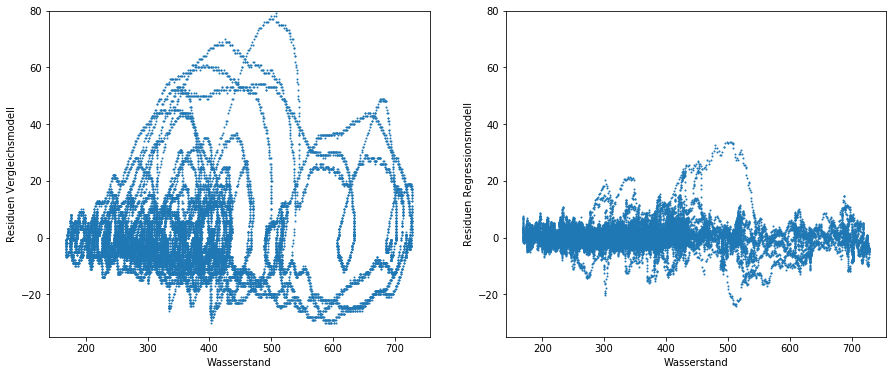

In [310]:
# plot residuals
fig, ax = plt.subplots(1,2, figsize = (15, 6))
ax[1].scatter(dependent_variable_test, residuals_regression, s = 1)
ax[0].scatter(dependent_variable_test, vergleichsmodell, s = 1)
ax[0].set_xlabel('Wasserstand')
ax[0].set_ylabel('Residuen Vergleichsmodell')

ax[1].set_xlabel('Wasserstand')
ax[1].set_ylabel('Residuen Regressionsmodell')

ax[0].set_ylim([-35, 80])
ax[1].set_ylim([-35, 80])


This gives us the additional information that our model remains reasonably accurate even for high water levels. We can also observe this in the next plot, which plots real and predicted water levels against each other:

Text(0, 0.5, 'vorhergesagter Wasserstand')

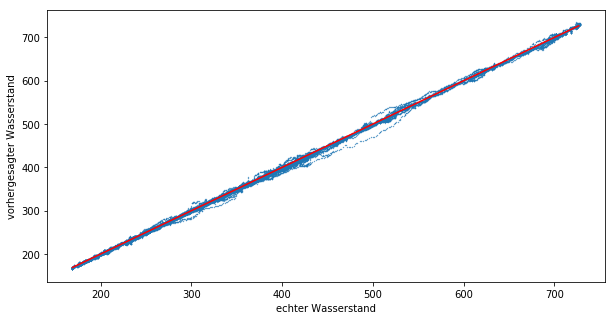

In [311]:
# plot real data <=> predictions

figure(figsize = (10,5))
plt.scatter(dependent_variable_test, prediction_regression_model, s = 0.1)
plt.plot(np.arange(min(dependent_variable_test), max(dependent_variable_test)), 
         np.arange(min((dependent_variable_test)), max(dependent_variable_test)), c = 'red')
plt.xlabel('echter Wasserstand')
plt.ylabel('vorhergesagter Wasserstand')

Finally, we take a look at a random time slice from the test set and plot real vs predicted water levels over time:

Datenindex: 14412 von 39935


Text(0, 0.5, 'Wasserstand')

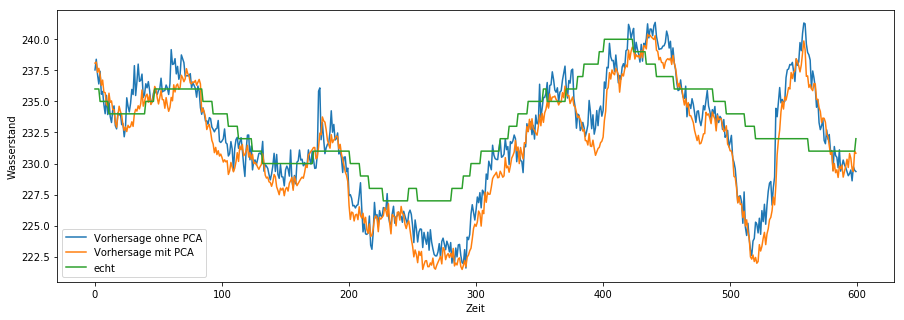

In [312]:
# plot echte Zeitreihe <=> vorhergesagte Zeitreihe
k = 600 # Länge vom geplotteten Intervall
zuf_ausschnitt = np.random.randint(0,len(residuals_regression)-k)
figure(figsize = (15,5))

vorhergesagt_ohne_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage ohne PCA')
vorhergesagt_mit_PCA = plt.plot(np.arange(0, min(k,len(residuals_regression))), 
                        pca_prediction_regression_model[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], 
                        label = 'Vorhersage mit PCA')
echt = plt.plot(np.arange(0, min(k,len(residuals_regression))),
                dependent_variable_test[zuf_ausschnitt:min(len(residuals_regression),zuf_ausschnitt+k)], label = 'echt')

plt.legend()
print("Datenindex:",zuf_ausschnitt ,"von", len(residuals_regression)-k)

plt.xlabel('Zeit')
plt.ylabel('Wasserstand')


## Prediction on recent measurements

Finally, we'll make a prediction on recent measurements just for fun:

In [313]:
#get data
dfcur = levels.to_frame(recent=True)
dfcur=dfcur.dropna()

Parse Andernach
Parse Bingen
Parse Bonn
Parse Frankfurt Osthafen
Parse Kalkofen Neu
Parse Kaub
Parse Koblenz
Parse Koblenz Up
Parse Mainz
Parse Oberwinter
Parse Oestrich
Parse Raunheim
Parse Rockenau Ska
Parse Speyer
Parse Worms


In [316]:
#test on recent measurements

#process the data so it matches our model:
test=dfcur.values
test0=test[25:-48]
testl=test[24:-49]
testl2=test[23:-50]
test1=test[21:-52]
test3=test[13:-60]
test6=test[1:-72]

data=np.c_[test0, testl, testl2, test1, test3, test6]

#get current water levels so we can compute the error of our model:
current_water_levels=(dfcur['Bonn'].values)[73:]


#without pca:
res=regression_model_fit.predict(data)
res=res.reshape(current_water_levels.size)

print('MSE without PCA:')
print(np.sum((current_water_levels-res)**2)/current_water_levels.size)

#with pca:
data_scaled = scaler.transform(data)
pca_data=pca.transform(data_scaled)

res2=scaler2.inverse_transform(pca_regression_model_fit.predict(pca_data))
res2=res2.reshape(current_water_levels.size)

print('MSE with PCA:')
print(np.sum((current_water_levels-res2)**2)/current_water_levels.size)

MSE without PCA:
7.136912462074055
MSE with PCA:
10.079959758561408


As we can see, we barely lose any accuracy through PCA on this data set as well.

Text(0, 0.5, 'Erklärte Varianz')

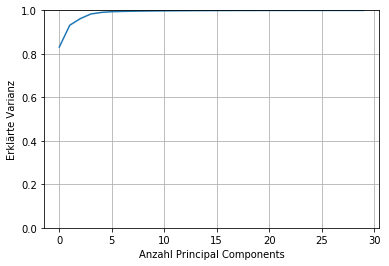

In [318]:
# Calculating the explanied variance of each Principal Component

fig = plt.figure()
ax = fig.add_subplot(111)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance)
ax.grid() 
ax.set_ylim([0,1])
ax.set_xlabel('Anzahl Principal Components')
ax.set_ylabel('Erklärte Varianz')

In [319]:
cumulative_explained_variance

array([0.83119182, 0.93181521, 0.96189974, 0.98316903, 0.99057395,
       0.99385248, 0.99514524, 0.99622859, 0.99682772, 0.99737029,
       0.99786027, 0.99820021, 0.99850514, 0.99878266, 0.9989654 ,
       0.99912336, 0.99924281, 0.99934729, 0.99944634, 0.99953402,
       0.99959653, 0.99964945, 0.99969695, 0.99972864, 0.99975836,
       0.99978472, 0.9998073 , 0.9998278 , 0.99984817, 0.99986725])

In [547]:
"""
Dritter Versuch: LSTM Netz
"""
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# nehmen nur die letzten 2 Jahre als Daten für schnelleres training
anzahl_daten = 200005
anzahl_features = 20
scaled_data = pca_independent_var[-anzahl_daten:,:anzahl_features]
labels_LSTM = dependent_variable_reduced_scaled[-anzahl_daten:]

In [548]:
pca_independent_var.shape

(851255, 30)

In [549]:
dependent_variable_reduced_scaled.shape

(851255, 1)

In [580]:
scaled_data

array([[-7.53156444e+00,  7.56077119e-01,  6.79935985e-01, ...,
        -3.35331495e-02, -3.37873541e-02, -3.04769882e-02],
       [-7.48814930e+00,  8.38617150e-01,  6.54606693e-01, ...,
         3.26481751e-02, -4.17937631e-02, -6.07759894e-03],
       [-7.47513603e+00,  8.73987576e-01,  6.59840302e-01, ...,
        -3.95143637e-02, -2.37060866e-02, -1.21067727e-02],
       ...,
       [ 5.98858119e+00, -3.82847900e+00,  1.59168485e-02, ...,
         1.77713417e-02, -9.13682182e-02,  3.22163655e-02],
       [ 5.98435908e+00, -3.81338322e+00, -4.86477976e-03, ...,
         9.82508971e-03, -9.72232863e-02,  4.32011380e-02],
       [ 5.98627089e+00, -3.78668049e+00,  7.03178226e-03, ...,
        -1.57413127e-03, -8.09394042e-02,  4.56288553e-02]])

In [555]:
# Erstelle Feature und Labelset und bringe sie in richtige Form:
# features_pro_datenpunkt gibt an, wieviele vergangene Zeitschritte man pro Vorhersage betrachtet
def data_preprocessing_LSTM(data, labels, features_pro_datenpunkt):
    featureset = []
    labelset = []
    
    for i in range(features_pro_datenpunkt, data.shape[0]):
        featureset.append(data[i-features_pro_datenpunkt:i,:])
        labelset.append(labels[i])
    
    # in richtige Form für keras bringen
    featureset, labelset = np.array(featureset), np.array(labelset)
    #featureset = np.reshape(featureset, (featureset.shape[0], featureset.shape[1], featureset.shape[2]))
    
    return featureset, labelset


In [556]:

featureset, labelset = data_preprocessing_LSTM(scaled_data, labels_LSTM, anzahl_features)

In [557]:
featureset.shape

(199985, 20, 20)

In [558]:
featureset[0,0,0]

-7.531564438765485

In [560]:
scaled_data

array([[-7.53156444e+00,  7.56077119e-01,  6.79935985e-01, ...,
        -3.35331495e-02, -3.37873541e-02, -3.04769882e-02],
       [-7.48814930e+00,  8.38617150e-01,  6.54606693e-01, ...,
         3.26481751e-02, -4.17937631e-02, -6.07759894e-03],
       [-7.47513603e+00,  8.73987576e-01,  6.59840302e-01, ...,
        -3.95143637e-02, -2.37060866e-02, -1.21067727e-02],
       ...,
       [ 5.98858119e+00, -3.82847900e+00,  1.59168485e-02, ...,
         1.77713417e-02, -9.13682182e-02,  3.22163655e-02],
       [ 5.98435908e+00, -3.81338322e+00, -4.86477976e-03, ...,
         9.82508971e-03, -9.72232863e-02,  4.32011380e-02],
       [ 5.98627089e+00, -3.78668049e+00,  7.03178226e-03, ...,
        -1.57413127e-03, -8.09394042e-02,  4.56288553e-02]])

In [523]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(10, input_shape=(featureset.shape[1], featureset.shape[2]), return_sequences = True, activation="sigmoid"))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="relu"))

model.compile(loss='mean_squared_error', optimizer=Adam())

In [524]:
model.fit(featureset, labelset, epochs=10, batch_size=10000, verbose=1)

Epoch 1/10
 10000/200000 [>.............................] - ETA: 27:57 - loss: 0.9417

KeyboardInterrupt: 

In [ ]:
# testing LSTM on some other Data
k = 20000
zuf_ausschnitt = np.random.randint(k,pca_independent_var.shape[0]-anzahl_daten)
testset_LSTM = pca_independent_var[zuf_ausschnitt-k:zuf_ausschnitt,:anzahl_features]
labels_test_LSTM_temp = dependent_variable_reduced_scaled[zuf_ausschnitt-k:zuf_ausschnitt]
featureset_test, labelset_test_scaled = data_preprocessing_LSTM(testset_LSTM, labels_test_LSTM_temp, anzahl_features)
#testset_LSTM_scaled = scaling.fit_transform(testset_LSTM)

In [ ]:
featureset_test.shape

In [ ]:
predictions_LSTM_scaled = model.predict(featureset_test)

In [ ]:
# Daten müssen zurückskaliert werden
predictions_LSTM = scaler2.inverse_transform(predictions_LSTM_scaled)
labelset_test_LSTM = scaler2.inverse_transform(labelset_test_scaled)

In [ ]:
MSE_LSTM = mean_squared_error(labelset_test_LSTM, predictions_LSTM)

In [ ]:
MSE_LSTM

In [ ]:
residuals_LSTM = labelset_test_LSTM-predictions_LSTM
plt.scatter(labelset_test_LSTM, residuals_LSTM)

In [ ]:
predictions_LSTM

In [ ]:
labelset_test_LSTM

In [ ]:
plt.hist(predictions_LSTM)